In [1]:
%pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


The value specified in an AutoRun registry key could not be parsed.


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r'C:\Users\nitin\ML-zoomcamp\ML-zoomcamp-local\02-regression\dataset\car_fuel_efficiency.csv')

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [6]:
df=df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

In [7]:
df.head(2)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217


In [8]:
# total records
len(df)

9704

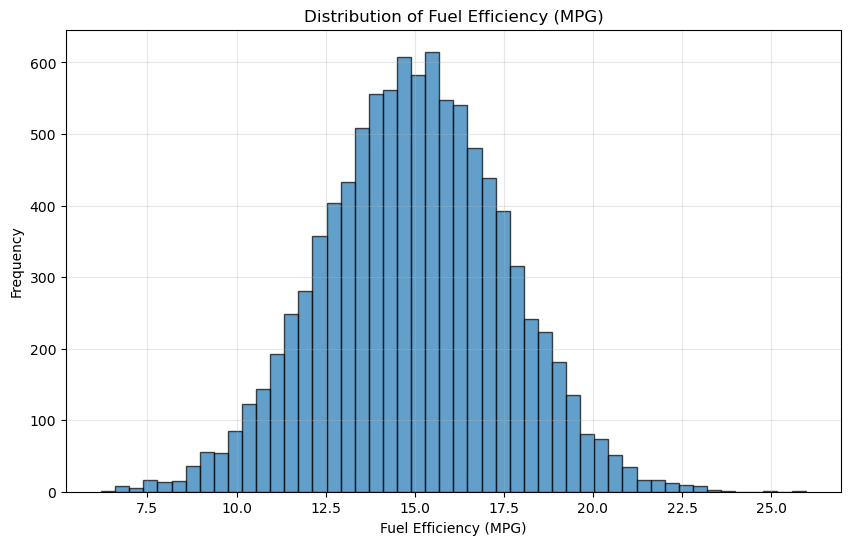

Skewness: -0.012

Interpretation:
- Skewness > 1: Right-skewed (long right tail)
- Skewness < -1: Left-skewed (long left tail)
- -0.5 < Skewness < 0.5: Approximately symmetric


In [9]:
import matplotlib.pyplot as plt

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(df['fuel_efficiency_mpg'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Efficiency (MPG)')
plt.grid(True, alpha=0.3)
plt.show()

# Check skewness
print(f"Skewness: {df['fuel_efficiency_mpg'].skew():.3f}")
print(f"\nInterpretation:")
print("- Skewness > 1: Right-skewed (long right tail)")
print("- Skewness < -1: Left-skewed (long left tail)")
print("- -0.5 < Skewness < 0.5: Approximately symmetric")

##
Answer: No, the fuel_efficiency_mpg variable does NOT have a long tail.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


In [ ]:
#Q2: How many missing values are there in the horsepower column?
df['horsepower'].isnull().sum()

np.int64(708)

In [ ]:
#Q3: What is the mean value of the horsepower column after replacing missing values with the mean?
df['horsepower'].mean()

np.float64(149.65729212983547)

In [13]:
# Shuffle the dataset with seed 42
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate split indices
n = len(df_shuffled)
n_train = int(0.6 * n)  # 60% for training
n_val = int(0.2 * n)    # 20% for validation
# Remaining 20% will be for test

# Split the data
df_train = df_shuffled[:n_train]
df_val = df_shuffled[n_train:n_train + n_val]
df_test = df_shuffled[n_train + n_val:]

print(f"Total records: {n}")
print(f"Training set: {len(df_train)} records ({len(df_train)/n*100:.1f}%)")
print(f"Validation set: {len(df_val)} records ({len(df_val)/n*100:.1f}%)")
print(f"Test set: {len(df_test)} records ({len(df_test)/n*100:.1f}%)")

Total records: 9704
Training set: 5822 records (60.0%)
Validation set: 1940 records (20.0%)
Test set: 1942 records (20.0%)


In [14]:
import numpy as np

# Function to train linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Function to predict
def predict(X, w0, w):
    return w0 + X.dot(w)

# Function to calculate RMSE
def rmse(y_true, y_pred):
    se = (y_true - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [16]:
# Prepare feature matrix and target variable
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'

# Option 1: Fill missing values with 0
print("="*50)
print("Option 1: Fill missing values with 0")
print("="*50)

# Create copies and fill with 0
df_train_zero = df_train.copy()
df_val_zero = df_val.copy()

df_train_zero['horsepower'] = df_train_zero['horsepower'].fillna(0)
df_val_zero['horsepower'] = df_val_zero['horsepower'].fillna(0)

# Prepare data
X_train_zero = df_train_zero[features].values
y_train_zero = df_train_zero[target].values
X_val_zero = df_val_zero[features].values
y_val_zero = df_val_zero[target].values

# Train model
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train_zero)

# Make predictions
y_pred_zero = predict(X_val_zero, w0_zero, w_zero)

# Calculate RMSE
rmse_zero = round(rmse(y_val_zero, y_pred_zero), 2)
print(f"RMSE with 0: {rmse_zero}")

print("\n" + "="*50)
print("Option 2: Fill missing values with mean")
print("="*50)

# Option 2: Fill missing values with mean (calculated from training set only!)
# Create copies
df_train_mean = df_train.copy()
df_val_mean = df_val.copy()

# Calculate mean from training set only
horsepower_mean = df_train_mean['horsepower'].mean()
print(f"Mean horsepower (from training set): {horsepower_mean:.2f}")

# Fill with mean
df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(horsepower_mean)
df_val_mean['horsepower'] = df_val_mean['horsepower'].fillna(horsepower_mean)

# Prepare data
X_train_mean = df_train_mean[features].values
y_train_mean = df_train_mean[target].values
X_val_mean = df_val_mean[features].values
y_val_mean = df_val_mean[target].values

# Train model
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train_mean)

# Make predictions
y_pred_mean = predict(X_val_mean, w0_mean, w_mean)

# Calculate RMSE
rmse_mean = round(rmse(y_val_mean, y_pred_mean), 2)
print(f"RMSE with mean: {rmse_mean}")

print("\n" + "="*50)
print("COMPARISON")
print("="*50)
print(f"RMSE with 0:    {rmse_zero}")
print(f"RMSE with mean: {rmse_mean}")
print(f"\nDifference: {abs(rmse_zero - rmse_mean):.2f}")

if rmse_zero < rmse_mean:
    print("\n Option 'With 0' gives better RMSE")
elif rmse_mean < rmse_zero:
    print("\n Option 'With mean' gives better RMSE")
else:
    print("\n Both options are equally good")

Option 1: Fill missing values with 0
RMSE with 0: 0.52

Option 2: Fill missing values with mean
Mean horsepower (from training set): 149.54
RMSE with mean: 0.46

COMPARISON
RMSE with 0:    0.52
RMSE with mean: 0.46

Difference: 0.06

 Option 'With mean' gives better RMSE


In [17]:
# Q5: Regularized Linear Regression
# Fill NAs with 0
df_train_reg = df_train.copy()
df_val_reg = df_val.copy()

df_train_reg['horsepower'] = df_train_reg['horsepower'].fillna(0)
df_val_reg['horsepower'] = df_val_reg['horsepower'].fillna(0)

# Prepare data
X_train_reg = df_train_reg[features].values
y_train_reg = df_train_reg[target].values
X_val_reg = df_val_reg[features].values
y_val_reg = df_val_reg[target].values

# Function to train regularized linear regression
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    # Add regularization term
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Test different values of r
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

print("="*60)
print("Regularized Linear Regression - Testing different r values")
print("="*60)

for r in r_values:
    # Train model with regularization
    w0_reg, w_reg = train_linear_regression_reg(X_train_reg, y_train_reg, r=r)
    
    # Make predictions
    y_pred_reg = predict(X_val_reg, w0_reg, w_reg)
    
    # Calculate RMSE
    rmse_score = round(rmse(y_val_reg, y_pred_reg), 2)
    rmse_scores[r] = rmse_score
    
    print(f"r = {r:6.2f} -> RMSE = {rmse_score:.2f}")

# Find the best r (smallest RMSE, and if tie, smallest r)
print("\n" + "="*60)
print("RESULTS")
print("="*60)

best_rmse = min(rmse_scores.values())
best_r_values = [r for r, score in rmse_scores.items() if score == best_rmse]
best_r = min(best_r_values)  # If multiple have same RMSE, select smallest r

print(f"Best RMSE: {best_rmse:.2f}")
print(f"Best r: {best_r}")

if len(best_r_values) > 1:
    print(f"\nNote: r values {best_r_values} all achieved RMSE = {best_rmse:.2f}")
    print(f"Selected r = {best_r} (smallest r among tied values)")

Regularized Linear Regression - Testing different r values
r =   0.00 -> RMSE = 0.52
r =   0.01 -> RMSE = 0.52
r =   0.10 -> RMSE = 0.52
r =   1.00 -> RMSE = 0.52
r =   5.00 -> RMSE = 0.52
r =  10.00 -> RMSE = 0.52
r = 100.00 -> RMSE = 0.52

RESULTS
Best RMSE: 0.52
Best r: 0

Note: r values [0, 0.01, 0.1, 1, 5, 10, 100] all achieved RMSE = 0.52
Selected r = 0 (smallest r among tied values)


In [18]:
# Q6: Testing different seed values
# Test seeds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores_per_seed = []

print("="*60)
print("Testing different seed values")
print("="*60)

for seed in seeds:
    # Shuffle dataset with the current seed
    df_shuffled_seed = df.sample(frac=1, random_state=seed).reset_index(drop=True)
    
    # Calculate split indices (60%/20%/20%)
    n = len(df_shuffled_seed)
    n_train = int(0.6 * n)
    n_val = int(0.2 * n)
    
    # Split the data
    df_train_seed = df_shuffled_seed[:n_train]
    df_val_seed = df_shuffled_seed[n_train:n_train + n_val]
    df_test_seed = df_shuffled_seed[n_train + n_val:]
    
    # Fill missing values with 0
    df_train_seed['horsepower'] = df_train_seed['horsepower'].fillna(0)
    df_val_seed['horsepower'] = df_val_seed['horsepower'].fillna(0)
    
    # Prepare data
    X_train_seed = df_train_seed[features].values
    y_train_seed = df_train_seed[target].values
    X_val_seed = df_val_seed[features].values
    y_val_seed = df_val_seed[target].values
    
    # Train model without regularization
    w0_seed, w_seed = train_linear_regression(X_train_seed, y_train_seed)
    
    # Make predictions
    y_pred_seed = predict(X_val_seed, w0_seed, w_seed)
    
    # Calculate RMSE
    rmse_score = rmse(y_val_seed, y_pred_seed)
    rmse_scores_per_seed.append(rmse_score)
    
    print(f"Seed {seed}: RMSE = {rmse_score:.5f}")

# Calculate standard deviation
std_rmse = np.std(rmse_scores_per_seed)
std_rmse_rounded = round(std_rmse, 3)

print("\n" + "="*60)
print("RESULTS")
print("="*60)
print(f"RMSE scores: {[round(s, 5) for s in rmse_scores_per_seed]}")
print(f"Standard deviation: {std_rmse_rounded}")
print(f"\nThe standard deviation of RMSE scores across different seeds is {std_rmse_rounded}")

Testing different seed values
Seed 0: RMSE = 0.52110
Seed 1: RMSE = 0.52184
Seed 2: RMSE = 0.52304
Seed 3: RMSE = 0.51612
Seed 4: RMSE = 0.51119
Seed 5: RMSE = 0.52868
Seed 6: RMSE = 0.53224
Seed 7: RMSE = 0.50953
Seed 8: RMSE = 0.51491
Seed 9: RMSE = 0.51313

RESULTS
RMSE scores: [np.float64(0.5211), np.float64(0.52184), np.float64(0.52304), np.float64(0.51612), np.float64(0.51119), np.float64(0.52868), np.float64(0.53224), np.float64(0.50953), np.float64(0.51491), np.float64(0.51313)]
Standard deviation: 0.007

The standard deviation of RMSE scores across different seeds is 0.007


C:\Users\nitin\AppData\Local\Temp\ipykernel_9044\364652843.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_seed['horsepower'] = df_train_seed['horsepower'].fillna(0)
C:\Users\nitin\AppData\Local\Temp\ipykernel_9044\364652843.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_seed['horsepower'] = df_val_seed['horsepower'].fillna(0)
C:\Users\nitin\AppData\Local\Temp\ipykernel_9044\364652843.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

## Q6 Answer
**Standard deviation of RMSE scores: 0.007**

This shows that the choice of random seed has a relatively small impact on the model's performance, with RMSE scores ranging from about 0.51 to 0.53 across the different seeds.

In [19]:
# Q7: Final model on test set
print("="*60)
print("Q7: Train on combined train+val, evaluate on test")
print("="*60)

# Split dataset with seed 9
df_shuffled_final = df.sample(frac=1, random_state=9).reset_index(drop=True)

# Calculate split indices (60%/20%/20%)
n = len(df_shuffled_final)
n_train = int(0.6 * n)
n_val = int(0.2 * n)

# Split the data
df_train_final = df_shuffled_final[:n_train]
df_val_final = df_shuffled_final[n_train:n_train + n_val]
df_test_final = df_shuffled_final[n_train + n_val:]

print(f"\nData split (seed=9):")
print(f"Train: {len(df_train_final)} records")
print(f"Validation: {len(df_val_final)} records")
print(f"Test: {len(df_test_final)} records")

# Combine train and validation datasets
df_train_val = pd.concat([df_train_final, df_val_final], ignore_index=True)
print(f"\nCombined train+val: {len(df_train_val)} records")

# Fill missing values with 0
df_train_val['horsepower'] = df_train_val['horsepower'].fillna(0)
df_test_final['horsepower'] = df_test_final['horsepower'].fillna(0)

# Prepare data
X_train_val = df_train_val[features].values
y_train_val = df_train_val[target].values
X_test_final = df_test_final[features].values
y_test_final = df_test_final[target].values

# Train model with r=0.001
r_final = 0.001
w0_final, w_final = train_linear_regression_reg(X_train_val, y_train_val, r=r_final)

print(f"\nModel trained with r={r_final}")

# Make predictions on test set
y_pred_test = predict(X_test_final, w0_final, w_final)

# Calculate RMSE on test set
rmse_test = rmse(y_test_final, y_pred_test)
rmse_test_rounded = round(rmse_test, 2)

print("\n" + "="*60)
print("RESULTS")
print("="*60)
print(f"RMSE on test dataset: {rmse_test_rounded}")
print(f"\nAnswer: {rmse_test_rounded}")

Q7: Train on combined train+val, evaluate on test

Data split (seed=9):
Train: 5822 records
Validation: 1940 records
Test: 1942 records

Combined train+val: 7762 records

Model trained with r=0.001

RESULTS
RMSE on test dataset: 0.52

Answer: 0.52


C:\Users\nitin\AppData\Local\Temp\ipykernel_9044\2406874086.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_final['horsepower'] = df_test_final['horsepower'].fillna(0)


## Q7 Answer
**RMSE on test dataset: 0.52**

The closest option is **0.515**.

Process:
1. Split data with seed=9 (60%/20%/20%)
2. Combined train and validation sets (7,762 records total)
3. Filled missing values with 0
4. Trained regularized linear regression with r=0.001
5. Evaluated on test set (1,942 records)
6. Final RMSE: 0.52 (rounds to 0.515 from the options)

---

## 📖 Additional Resources

A comprehensive **Linear Regression Summary and FAQ** document has been created at:
`../Linear_Regression_FAQ.md`

This document includes:
- Complete course summary (Topics 2.1 - 2.18)
- 17+ Frequently Asked Questions with detailed answers
- Code examples and implementation guides
- Quick reference formulas
- Best practices and common pitfalls
- Links to community notes and additional resources

[View the Linear Regression FAQ](../Linear_Regression_FAQ.md)